In [5]:
%pylab inline
#%matplotlib qt
from __future__ import division # use so 1/2 = 0.5, etc.
import ssd
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [51]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
#pylab.rcParams['figure.figsize'] = (6.0, 4.0) # default (6,4)
#%config InlineBackend.figure_formats=['png'] # default for inline viewing
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

**Helper Function(s)**

In [52]:
def cpx_fmt(z,mode1='rect',mode2='f',mode3='deg',d1=2,d2=4):
    """
    Helper function for printing formatted complex numbers as %d1.d2f and
    %d1.d2e. The function returns a string that can be displayed using print()
    
    s_out = cpx_fmt(z,mode1='rect',mode2='f',d1=2,d2=4)
    
    mode1 = 'rect' or 'polar' form
    mode2 = 'f' for floating or 'e' for exponential
    mode3 = 'deg' or 'rad' for use in the polar display
    
    Mark Wickert January 2016
    """
    if mode1 == 'rect':
        if mode2 == 'f':
            mt = 'f'
        else:
            mt = 'e'
        if z.imag >= 0:
            s_o = '%'+str(d1)+'.'+str(d2)+mt+ ' + j%'+str(d1)+'.'+str(d2)+mt 
            s_out = s_o % (z.real,z.imag)
        else:
            s_o = '%'+str(d1)+'.'+str(d2)+mt+ ' - j%'+str(d1)+'.'+str(d2)+mt
            s_out = s_o % (z.real,abs(z.imag))
    else: # polar format otherwise
        if mode2 == 'f':
            mt = 'f'      
        else:
            mt = 'e'
        s_o = '%'+str(d1)+'.'+str(d2)+mt+ ' /_%'+str(d1)+'.'+str(d2)+mt
        if mode3 == 'deg':
            s_o += ' (deg)'
            s_out = s_o % (abs(z),angle(z)*180/pi)
        else:
            s_o += ' (rad)'
            s_out = s_o % (abs(z),angle(z))            
    return s_out

# Square Wave Dispersion Demo
In the interactive demo below we plot the first few harmonics of a square wave with time delay adjusters on the 3rd, 5th, and 7th harmonics. The time delay is introduced so we can see the how time dispersion in a transmission line distorts the square wave. Additional attenuation of the various harmonics will likely also be present, but is not modeled in this demo.

The math model implemented is:
\begin{align}
    x(t) &= A \sum_{n=1}^{N_\text{max}} \frac{1}{2n-1} \sin\big(2\pi\cdot (2n-1) f_0\cdot(t - dtn)\big)
\end{align}
where $A = 1$ and $f_0 = 1$ Hz, and here $N_\text{max} = 6$ which takes us up to the 11th harmonic (i.e., $2\cdot 6-1 =11$). The $2n-1$ is used to index over the odd integers starting at one when $n=1$.

<function __main__.sq_wave_plot>

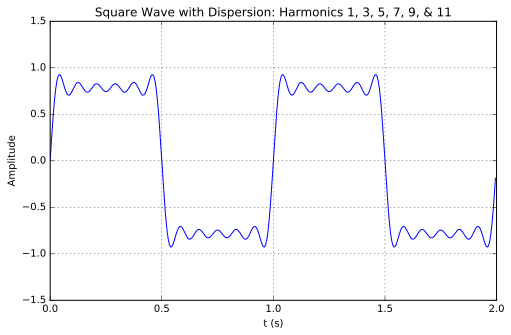

In [53]:
%matplotlib inline
# Make an interactive plot of +x and -x waves at time snapshots
from IPython.html.widgets import interact

def sq_wave_plot(dt3=0,dt5=0,dt7=0,dt11=0):
    """
    Plot the first three harmonics (1,3,5) of a squarewave with different
    time delays
    """
    # Assume x is in cm
    t = arange(0,2,.005)
    # Fundamental
    x = sin(2*pi*t)
    x += 1/3*sin(2*pi*3*(t-dt3)) # Add third
    x += 1/5*sin(2*pi*5*(t-dt5)) # Add fifth
    x += 1/7*sin(2*pi*7*(t-dt7)) # Add seventh
    x += 1/9*sin(2*pi*9*(t-0)) # Add ninth
    x += 1/11*sin(2*pi*11*(t-dt11)) # Add eleventh
    figure(figsize=(8,5))
    plot(t,x)
    ylim([-1.5,1.5])
    xlabel(r't (s)')
    ylabel(r'Amplitude');
    title(r'Square Wave with Dispersion: Harmonics 1, 3, 5, 7, 9, & 11')
    grid();
    
interact(sq_wave_plot,dt3 = (0,0.5,.01), dt5 = (0,0.5,0.01), 
         dt7 = (0,0.5,0.01), dt11 = (0,0.5,0.01))

## Transmission Line Parameters
The equations found in the text and notes which solve for $R'$, $L'$, $G'$, and $C'$ can esily be written up into a Python function.

### Coax Example
The example below is for coax.

In [54]:
def coax_parameters(a,b,f,e_r,sigma_c,sigma=1,mu=1,mu_c=1,display=True):
    """
    Find the distributed parameters of the coax line
    
    R_p, L_p, G_p, C_p = coax_parameters(a,b,f,e_r,sigma_c,
                                         sigma=1,mu=1,mu_c=1,
                                         display=True)
    Note: By default display is True, so to supress raw variables
          use a semicolon to terminate the function call.
    
    Mark Wickert February 2016
    """
    e_0 = 8.85e-12 # F/m
    mu_0 = 4*pi*1e-7 # H/m
    Rs = sqrt(pi*f*mu_0*mu_c/sigma_c)
    R_p = Rs/(2*pi)*(1/a +1/b) # Ohms/m  
    L_p = mu_0*mu/(2*pi)*log(b/a) #H/m
    G_p = 2*pi*sigma/log(b/a) # S/m
    C_p = 2*pi*e_0*e_r/log(b/a)
    # Display calculations as opposed to returning the value
    if display:
        print("R' = %2.5f ohms/m" % (R_p,))
        print("L' = %2.2f nH/m" % (L_p*1e9,))
        print("G' = %2.3f S/m" % (G_p,))
        print("C' = %2.2f pF/m" % (C_p*1e12,))
    return R_p, L_p, G_p, C_p

In [55]:
coax_parameters(6e-3,12e-3,1e6,1.0,5.8e7);

R' = 0.01038 ohms/m
L' = 138.63 nH/m
G' = 9.065 S/m
C' = 80.22 pF/m


## Microstrip Analysis and Design Equations
Here we code take the text analysis and design equations for zero strip thickness microstrip. These equation assume the line is lossless, that is $\sigma = 0$ (dielectric is lossless) so $G' = 0$ and the metal conductor is perfect, i.e. $R_s \approx 0$ so $R' \approx 0$. 

Three functions are involved (see Text pages 62--64):

1. `Z0, e_eff = mstrip_anal(w/h,er)` which finds the line characteristic impedance $Z_0$ given a particular width to height ratio $s = w/h$ and also returns $\epsilon_r$ (substrate relative permittivity).
2. `s, e_eff = mstrip_dsgn(Z0, er)` which finds the width to height ratio $s = w/h$ given the desired characteristic impedance $Z_0$ and also returns $\epsilon_r$ (substrate relative permittivity).
3. `e_eff = eps_eff(w/h,er)` which finds the effective permittivity of the microstrip given the ratio $s = w/h$ (width to substrate height ratio) and $\epsilon_r$ (substrate relative permittivity). This is a helper function called by the first two functions.

Additionally we may want to obtain $R'$, $L'$, $G'$, and $C'$. Since it assumed that $R' = 0$ and $G' = 0$, that leaves only $L'$ and $C'$ and we may also want to have $\alpha$ and $\beta$. These parameters can be found from
\begin{align*}
    C' &= \frac{1}{Z_0 v_p}=\frac{\sqrt{\epsilon_\text{eff}}}{Z_0 c} \\
    L' &= Z_0^2C' \\
    \alpha &= 0\ (\text{since $R' = G' = $}) \\
    \beta &= \frac{2\pi}{\lambda} = 2\pi\frac{f}{v_p}=2\pi\, \frac{f}{c/\sqrt{\epsilon_\text{eff}}} = \frac{\omega}{c}\sqrt{\epsilon_\text{eff}}
\end{align*}
where $v_p$ is the velocity of propagation in the medium, which here is $c/\sqrt{\epsilon_\text{eff}}$.

In [56]:
def mstrip_anal(s,er):
    """
    Microstrip zero thickness strips design function
    
    s = w/h
    er = material relative permittivity
    
    Z0 returned
    e_eff returned
    
    Mark Wickert February 2016
    """
    e_eff = eps_eff(s,er)
    t = (30.67/s)**0.75
    Z0 = 60/sqrt(e_eff) * \
         log((6+(2*pi-6)*exp(-t))/s + sqrt(1+4/s**2))
    return Z0, e_eff

def mstrip_dsgn(Z0,er):
    """
    Mircostrip zero thickness strips design function
    
    Z0 = desired characteristic impedance
    er = material relative permittivity
    
    s = w/h is returned
    e_eff returned
    
    Mark Wickert February 2016
    """
    if Z0 <= (44-2*er):
        q = 60*pi*pi/(Z0*sqrt(er))
        s = 2/pi*((q-1)-log(2*q-1) + \
                 (er-1)/(2*er)*(log(q-1)+0.29-0.52/er))
        
    else:
        p = sqrt((er+1)/2)*Z0/60+(er-1)/(er+1)*(0.23 + 0.12/er)
        s = 8*exp(p)/(exp(2*p)-2)
    e_eff = eps_eff(s,er)
    return s, e_eff

def eps_eff(s,er):
    """
    Find microstrip e_eff given s = w/h and er
    
    Mark Wickert February 2016
    """
    x = 0.56*((er-0.9)/(er+3))**0.05
    y = 1 + 0.02*log((s**4 + 3.7e-4*s**2)/(s**4+0.43)) + \
        0.05*log(1+1.7e-4*s**3)
    e_eff = (er+1)/2 + (er-1)/2*(1+10/s)**(-x*y)
    return e_eff

def mstrip_extra(Z0,er,f = 1e9,h = 1):
    """
    Extra parameters: L', C', beta, \lambda_g
    
    Z0 = characteristic impedance in Ohms
    er = relative permittivity
    f = operatng frequency in Hz
    h = substrate height in m
    
    Mark Wickert February 2016
    """
    c = 3e8 # m/s
    s, e_eff = mstrip_dsgn(Z0,er)
    C_p = sqrt(e_eff)/(Z0*c) # F/m
    L_p = Z0**2*C_p  #H/m
    R_p = 0
    G_p = 0
    alpha = 0
    beta = 2*pi/c*sqrt(e_eff) # rad/m
    lambda_g = c/sqrt(e_eff)/f # m
    # Print formatted results
    print('Line width w = %1.3e mm, Rel. perm: e_eff = %2.3f' % (s*h*1000,e_eff))
    print('Line width w = %1.3e mils (common PCB unit)' % (s*h*1000/0.0254,))
    print('-----------------------------------------------------')
    print("Resistance per unit length: R' = 0 ohms/m")
    print("Inductance per unit length: L' = %1.3e nH/m" % (L_p*1e9,))
    print("Conductance per unit length: G' = 0 S/n")
    print("Capacitance per unit length: C' = %1.3e pF/m" % (C_p*1e12,))
    print('-----------------------------------------------------')
    print('Phase constant: beta = %1.3e rad/m' % beta)
    print('Wavelength in free space: lambda = %1.3e cm' % (c/f*1e2,))
    print('Wavelength in medium (guide): lambda_g = %1.3e cm' % (lambda_g*1e2,))

In [57]:
1/16*1000

62.5

In [58]:
mstrip_extra(50,4.6,f= 2.4e9,h=1/16*2.54*1/100) #in*cm/in*m/cm

Line width w = 2.931e+00 mm, Rel. perm: e_eff = 3.460
Line width w = 1.154e+02 mils (common PCB unit)
-----------------------------------------------------
Resistance per unit length: R' = 0 ohms/m
Inductance per unit length: L' = 3.100e+02 nH/m
Conductance per unit length: G' = 0 S/n
Capacitance per unit length: C' = 1.240e+02 pF/m
-----------------------------------------------------
Phase constant: beta = 3.896e-08 rad/m
Wavelength in free space: lambda = 1.250e+01 cm
Wavelength in medium (guide): lambda_g = 6.720e+00 cm


In [59]:
print('Quarterwave line length at 2.4 GHz  = %1.3f cm' % (6.72/4,))
print('or %1.3f in.' % (6.72/4*1/2.54,))

Quarterwave line length at 2.4 GHz  = 1.680 cm
or 0.661 in.


## Microstrip Analysis Plots
Here we consider three material types: Micro-fiber PTFE, FR4, and Ceramic-filled PTFE over a range of $w/h$ values.

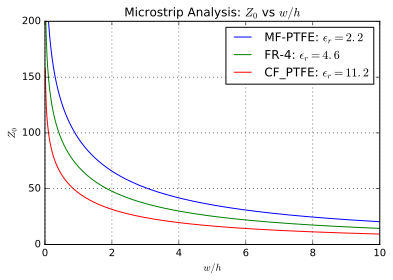

In [60]:
s = arange(0.01,10,.01)
Z0 = zeros_like(s)
e_eff = zeros_like(s)
er = (2.2,4.6,11.2)
for m in range(3):
    for k,sk in enumerate(s):
        Z0[k],e_eff[k] = mstrip_anal(sk,er[m])
    plot(s,Z0)
ylim([0,200])
xlabel(r'$w/h$')
ylabel(r'$Z_0$')
title(r'Microstrip Analysis: $Z_0$ vs $w/h$')
legend((r'MF-PTFE: $\epsilon_r = 2.2$',r'FR-4: $\epsilon_r=4.6$',
        r'CF_PTFE: $\epsilon_r=11.2$'),loc='best')
grid();

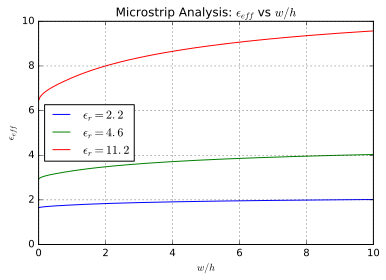

In [61]:
s = arange(0.01,10,.01)
Z0 = zeros_like(s)
e_eff = zeros_like(s)
er = (2.2,4.6,11.2)
for m in range(3):
    for k,sk in enumerate(s):
        Z0[k],e_eff[k] = mstrip_anal(sk,er[m])
    plot(s,e_eff)
ylim([0,10])
xlabel(r'$w/h$')
ylabel(r'$\epsilon_{eff}$')
title(r'Microstrip Analysis: $\epsilon_{eff}$ vs $w/h$')
legend((r'$\epsilon_r = 2.2$',r'$\epsilon_r=4.6$',
        r'$\epsilon_r=11.2$'),loc='best')
grid();

## Microstrip Design Plots
Here we consider three material types: Micro-fiber PTFE, FR4, and Ceramic-filled PTFE over a range of $w/h$ values.

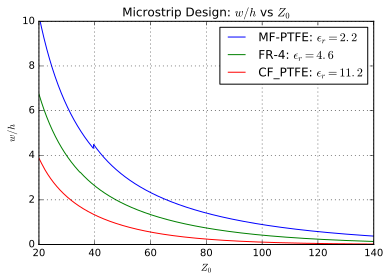

In [62]:
Z0 = arange(20,140,.1)
s = zeros_like(Z0)
e_eff = zeros_like(Z0)
er = (2.2,4.6,11.2)
for m in range(3):
    for k,Z0k in enumerate(Z0):
        s[k],e_eff[k] = mstrip_dsgn(Z0k,er[m])
    plot(Z0,s)
ylim([0,10])
xlabel(r'$Z_0$')
ylabel(r'$w/h$')
title(r'Microstrip Design: $w/h$ vs $Z_0$')
legend((r'MF-PTFE: $\epsilon_r = 2.2$',r'FR-4: $\epsilon_r=4.6$',
        r'CF_PTFE: $\epsilon_r=11.2$'),loc='best')
grid();

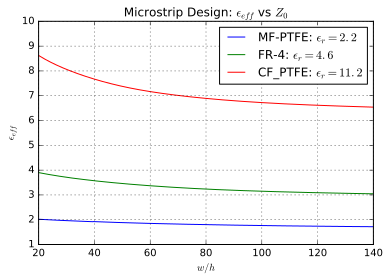

In [63]:
for m in range(3):
    for k,Z0k in enumerate(Z0):
        s[k],e_eff[k] = mstrip_dsgn(Z0k,er[m])
    plot(Z0,e_eff)
ylim([1,10])
xlabel(r'$w/h$')
ylabel(r'$\epsilon_{eff}$')
title(r'Microstrip Design: $\epsilon_{eff}$ vs $Z_0$')
legend((r'MF-PTFE: $\epsilon_r = 2.2$',r'FR-4: $\epsilon_r=4.6$',
        r'CF_PTFE: $\epsilon_r=11.2$'),loc='best')
grid();

## Finding $\epsilon_r$ Example

In [64]:
lambda_0 = 3e8/2.4e9
print('Lambda Freespace = %1.3f cm' % (lambda_0*100,))

Lambda Freespace = 12.500 cm


In [65]:
lambda_g = 3e8/2.4e9/sqrt(4.6)
print('Lambda Guide = %1.3f cm' % (lambda_g*100,))

Lambda Guide = 5.828 cm


In [66]:
(12.5/5.828)**2

4.6002447654072425

In [67]:
(3e8/2.4e9/0.05828)**2

4.6002447654072425

## Finding $u_p$, $C'$, and $Z_0$

In [68]:
up = 3e8/sqrt(6)
print('up = %1.3e m/s' % up)

up = 1.225e+08 m/s


In [69]:
C_p = 4*pi*1e-7*8.85e-12*6/0.8e-6
print('C_p = %1.3e F/m' % C_p)

C_p = 8.341e-11 F/m


In [70]:
Z0 = sqrt(0.8e-6/C_p)
print('Z0 = %1.3f Ohms' % Z0)

Z0 = 97.935 Ohms


## Find $\Gamma_L$ for a Series $RC$ Load

In [71]:
f = 100e6
Z0 = 100
RL = 50
CL = 10e-12
Z_CL = 1/(1j*2*pi*f*CL)
ZL = RL + Z_CL
GammaL = (ZL - Z0)/(ZL + Z0)
print('GammaL ' + cpx_fmt(GammaL,'polar'))

GammaL 0.7628 /_-60.7444 (deg)


# Standing Waves
Use Python to investigate voltage and current along a tline. Given that the reflection coefficient in polar form is $\Gamma = |\Gamma|e^{j\theta_r}$ and $d = -z$ is the positive distance back from the line load, we can write
\begin{align*}
        |\tilde{V}(d)| &= |V_0^+|\left[1+|\Gamma|^2 + 2|\Gamma|\cos\big(2\beta d - \theta_r\big)\right] \\
                |\tilde{I}(d)| &= \frac{|V_0^+|}{Z_0}\left[1+|\Gamma|^2 - 2|\Gamma|\cos\big(2\beta d - \theta_r\big)\right] 
\end{align*}
for $0 \leq d \leq l$. The above math follows the text and notes.

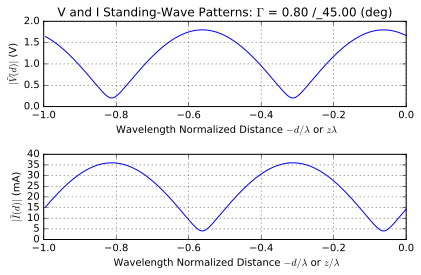

In [72]:
d2lam  = arange(0,1,0.005) # d/lambda for plotting
V0_p_mag = 1.0 # V
Z0 = 50 # Ohms
Gamma = 0.8*exp(1j*45*(pi/180))
#Gamma = -1.0
V_abs = V0_p_mag*(1 + abs(Gamma)**2 + \
                  2*abs(Gamma)*cos(2*(2*pi*d2lam) - angle(Gamma)))**0.5
I_abs = V0_p_mag/Z0*(1 + abs(Gamma)**2 - \
                     2*abs(Gamma)*cos(2*(2*pi*d2lam) - angle(Gamma)))**0.5
subplot(211)
plot(-d2lam,V_abs)
ylim([0,2])
xlabel(r' Wavelength Normalized Distance $-d/\lambda$ or $z\lambda$')
ylabel(r'$|\tilde{V}(d)|$ (V)')
title(r'V and I Standing-Wave Patterns: $\Gamma$ = ' + \
      cpx_fmt(Gamma,'polar',d2=2))
grid()
subplot(212)
plot(-d2lam,I_abs*1e3)
ylim([0,2/Z0*1e3])
xlabel(r' Wavelength Normalized Distance $-d/\lambda$ or $z/\lambda$')
ylabel(r'$|\tilde{I}(d)|$ (mA)')
grid()
tight_layout()

# Finding $L$ That Makes $S = 5$
Consider a load $Z_L$ composed of $R_L = 50\ \omega$ in parallel with an inductor, $L$. Assume the line impedance is $Z_0 = 100\ \Omega$ and $f = 100$ MHz.


* The load impedance is
\begin{align}
    Z_L = \frac{R_L\cdot j\omega L}{R_L + j\omega L}
\end{align}
* $S = \text{VSWR}$ is related to $|\Gamma|$ via
\begin{align}
    S = \frac{1 + |\Gamma|}{1 - |\Gamma|}\ \Rightarrow\ |\Gamma| = \frac{S-1}{S+1} = \frac{4}{6} = \frac{2}{3}
\end{align} 

## Exact Solution

In [73]:
Gam_mag = 2/3
Z0 = 100
RL = 50
w = 2*pi*100e6
L = sqrt((Z0*RL)**2*(1-(Gam_mag)**2)/(w**2*((Z0+RL)**2*Gam_mag**2-(Z0-RL)**2)))
print('L = %1.3f (nH)' % (L*1e9,))

L = 68.489 (nH)


### Solve Numerically
Here we simply plot $|\Gamma|$ versus $L$ and then use `fsolve` from `scipy.optimize` to solve for the value of $L$ where $|\Gamma|$ crosses through 2/3.

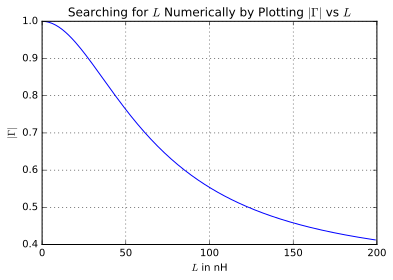

In [74]:
# Plot Abs[Gamma] versus C
L = arange(1,200)*1e-9
Gamma_mag = abs((-5000 - 1j*2*pi*100e6*L*50)/(5000 + 1j*2*pi*100e6*L*150))
plot(L*1e9,Gamma_mag)
title(r'Searching for $L$ Numerically by Plotting $|\Gamma|$ vs $L$')
ylabel(r'$|\Gamma|$')
xlabel(r'$L$ in nH')
grid();

In [75]:
from scipy.optimize import fsolve

In [76]:
def Gamma_abs_objective(L):
    """
    |Gamma| - 2/3 as a function of L
    
    Mark Wickert February 2016
    """
    L = L*1e-9
    RL = 50
    Z0 = 100
    f = 100e6
    w = 2*pi*f
    Gamma_abs = abs(((RL*1j*w*L)/(RL+1j*w*L)-Z0)/((RL*1j*w*L)/(RL+1j*w*L)+Z0))
    return Gamma_abs - 2/3 # Looking for zero crossing

In [77]:
L_req = fsolve(Gamma_abs_objective,100,xtol = 1e-5)
print('L_req = %1.1f nH' % (L_req,))

L_req = 68.5 nH
